# Анализ данных в биологии
## Домашнее задание 1


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_bio20_bot`.
* Дедлайн **08 ноября 23:59**. После дедлайна работы не принимаются, кнопка сдачи в боте исчезает автоматически. О наличии уважительной причины нужно предупредить преподавателя.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

### Задача 1. Проверка статистических гипотез.
Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ --- проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ --- неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ (отсутствие связи между черным котом и неудачей) против альтернативы $\mathsf{H}_1\colon p>1/2$ (неудача происходит чаще если черный кот перебегает дорогу).

Известно, что $S = \left\{T(X) \geqslant c_\alpha\right\}$, где $T(X) = \sum X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. 
Чему при этом равно $c_\alpha$ и как определяется p-value?

$c_\alpha$ --- критическое значение, его выбор зависит от желаемой точности результата, обычно $\alpha$ принимают равным 0.05 и $c_\alpha$ находят из условия $P(T(X) \geqslant c_\alpha) \leqslant \alpha$.

p-value можно определять как площадь области под кривой плотности вероятности результов, ограниченной по оси абсцисс наблюдаемой точкой данных ($T(X)$) и бесконечностью.


Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы (можно через `pandas.DataFrame`).

Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [2]:
dt = []
for n, p in [(5, 0.5),(5, 0.9), (10, 0.5), (10, 0.8), (50, 0.5), (100, 0.65),
             (500, 0.6), (1000, 0.5), (1000, 0.55), (10000, 0.5), (10000, 0.52)]:
    X = sps.bernoulli.rvs(p = p, size=n)
    T = X.sum()
    p_value = sps.binom(n = n, p=0.5).sf(T) #было в ваших примерах
    p_v = sps.binom_test(x = T, n = n, p=0.5, alternative='greater') #было найдено в интернете
    #кажется, что более правильный вариат изпользовать .sf(T), потому что  при n = 5, с_a = 4  и T = 4 (т.е. c_a = T)
    #p-value, полученное из биномиального теста, не дает возможности отвергнуть гипотезу
    # дальше будем считать p-value методом с семинаров
    c = sps.binom(n = n, p = 0.5).ppf(0.95)
    data = [n, p, T, c, p_value, p_v]
    dt.append(data)
pd.DataFrame(data = dt, columns = ['n', 'p', 'T', 'c$_\\alpha$', 'p-value$_{sf}$', " p-value$_{binom-test}$"])

,n,p,T,c$_\alpha$,p-value$_{sf}$,p-value$_{binom-test}$
0,5,0.50,5,4.0,0.000000e+00,3.125000e-02
1,5,0.90,5,4.0,0.000000e+00,3.125000e-02
2,10,0.50,6,8.0,1.718750e-01,3.769531e-01
3,10,0.80,6,8.0,1.718750e-01,3.769531e-01
4,50,0.50,26,31.0,3.359055e-01,4.438624e-01
5,100,0.65,74,58.0,2.818141e-07,8.336813e-07
6,500,0.60,303,268.0,7.817417e-07,1.223568e-06
7,1000,0.50,501,526.0,4.622128e-01,4.873875e-01
8,1000,0.55,564,526.0,2.206809e-05,2.895298e-05
9,10000,0.50,4927,5082.0,9.264726e-01,9.292210e-01


Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 

Это зависит от размера выборки. Для маленьких (меньше 10 наблюдений) выборок p должно быть близко к 1, а потом чем больше выборка, тем ближе к 0.5 можно брать p.

С точки зрения практики, наверное, значение р должно быть близко к 1 (к примеру 0.95), чтобы можно было считать, что есть связь между котом и неудачей. 

Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 -- отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [3]:
n = 5
p = 0.75
dt = []
for i in range(10):
    X = sps.bernoulli.rvs(p = p, size=n)
    T = X.sum()
    p_v = sps.binom(n = n, p=0.5).sf(T)
    c = sps.binom(n = n, p = 0.5).ppf(0.95)
    H = int(T > c)
    data = [T, p_v, H]
    dt.append(data)
pd.DataFrame(data = dt, columns = ['T', 'p-value', 'H'])

,T,p-value,H
0,2,0.50000,0
1,5,0.00000,1
2,5,0.00000,1
3,4,0.03125,0
4,5,0.00000,1
5,4,0.03125,0
6,5,0.00000,1
7,5,0.00000,1
8,4,0.03125,0
9,3,0.18750,0


In [4]:
n = 100000
p = 0.51
dt = []
for i in range(10):
    X = sps.bernoulli.rvs(p = p, size = n)
    T = X.sum()
    p_v = sps.binom(n = n, p=0.5).sf(T)
    c = sps.binom(n = n, p = 0.5).ppf(0.95)
    H = int(T > c)
    data = [T, p_v, H]
    dt.append(data)
pd.DataFrame(data = dt, columns = ['T', 'p-value', 'H'])

,T,p-value,H
0,50834,6.531515e-08,1
1,50802,1.931778e-07,1
2,50957,6.979925e-10,1
3,50964,5.296205e-10,1
4,51185,3.237341e-14,1
5,51028,3.883917e-11,1
6,51397,4.823158e-19,1
7,50948,9.925862e-10,1
8,50873,1.650857e-08,1
9,51381,1.187188e-18,1


**Вывод:**

При росте размера выборки критерий работает лучше (увеличивается его мощность), но при очень больших размерах выборки тоже возникают проблемы.

Для малых выборок даже при большом $p$ мы не можем отвергнуть гипотезу, а если выборка большая, то даже если $p$ близко к 0.5, гипотеза отвергается.

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

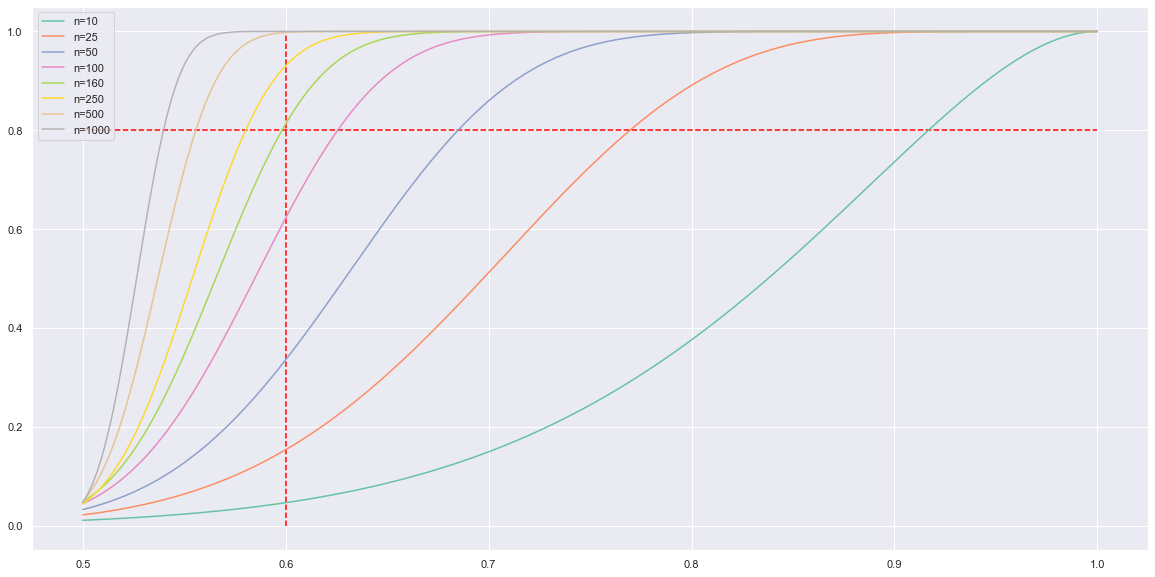

In [5]:
p = 0.6 #такой пример был рассмотрен в лекции
plt.figure(figsize=(20, 10))
dots = np.linspace(0.5,1.0,500)
for n in [10, 25, 50, 100, 160, 250, 500, 1000]:
    power = []
    c = sps.binom(n = n, p = 0.5).ppf(0.95)
    for j in dots:
        power.append(sps.binom(n = n, p=j).sf(c))   
    plt.plot(dots, power, label=f'n={n}')    
plt.hlines(0.8,0.5, 1, color = 'r', linestyle = 'dashed')
plt.vlines(p, 0, 1, color = 'r', linestyle = 'dashed')
plt.legend()
plt.show()

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.

In [6]:
n = 160
p = 0.55
dt = []
for i in range(10):
    X = sps.bernoulli.rvs(p = p, size = n)
    T = X.sum()
    p_v = sps.binom(n = n, p=0.5).sf(T) 
    c = sps.binom(n = n, p = 0.5).ppf(0.95)
    H = int(T > c)
    data = [T, p_v, H]
    dt.append(data)
pd.DataFrame(data = dt, columns = ['T', 'p-value', 'H'])

,T,p-value,H
0,86,0.152030,0
1,88,0.089389,0
2,89,0.066411,0
3,87,0.117791,0
4,90,0.048285,0
5,94,0.010787,1
6,89,0.066411,0
7,97,0.002745,1
8,98,0.001658,1
9,94,0.010787,1


In [7]:
n = 160
p = 0.65
dt = []
for i in range(10):
    X = sps.bernoulli.rvs(p = p, size = n)
    T = X.sum()
    p_v = sps.binom(n = n, p=0.5).sf(T) 
    c = sps.binom(n = n, p = 0.5).ppf(0.95)
    H = int(T > c)
    data = [T, p_v, H]
    dt.append(data)
pd.DataFrame(data = dt, columns = ['T', 'p-value', 'H'])

,T,p-value,H
0,110,5.262790e-07,1
1,97,2.745273e-03,1
2,113,3.794036e-08,1
3,94,1.078691e-02,1
4,101,3.146735e-04,1
5,100,5.614526e-04,1
6,93,1.623705e-02,1
7,109,1.194107e-06,1
8,96,4.436795e-03,1
9,112,9.384558e-08,1


**Вывод:**

Мы смогли выбрать близкий к оптимальному размер выборки, если $1/2 < p < p^*$, то гипотеза почти никогда не отвергается, а при $p > p^*$ гипотеза в большинстве случаев отвергается.

### Задача 2. Дисперсионный анализ данных РНК-секвенирования.

В этой задаче мы воспользуемся данными из статьи
<a href="https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0099625">Himes et al: “RNA-seq Transcriptome Profiling Identifies CRISPLD2 as a Glucocorticoid Responsive Gene that Modulates Cytokine Function in Airway Smooth Muscle Cells”</a>.
    
В данной статье охарактеризованы изменения в транскриптоме клеточной линии гладких мышц дыхательных путей после воздействия дексаметазоном.

Мы воспользуемся уже предобработанными данными, представленными в формате "gene-count matrix", где для каждого образца в таблице содержится число детектированных транскриптов. Таблица также уже заранее нормализована. Подробнее о предобработке данных можно прочитать <a href="https://bioconductor.org/packages/release/data/experiment/vignettes/airway/inst/doc/airway.html">здесь</a>.


Сначала загрузим необходимые библиотеки:

Загрузим данные:

In [8]:
data = pd.read_csv("data/airway_log_norm.csv", sep=" ")
dataFC = pd.read_csv("data/airway_log_norm.csv", sep=" ")
databox = pd.read_csv("data/airway_log_norm.csv", sep=" ")

data.head()

,Unnamed: 0,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
0,ENSG00000000003,9.375722,8.968399,9.533627,9.252444,9.917840,9.549539,9.709512,9.244607
1,ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,8.836718,9.169098,9.043029,9.092050,8.964171,9.160142,8.826159,9.073720
3,ENSG00000000457,7.994317,7.885375,7.807216,7.941086,7.707619,7.892339,7.988950,7.927498
4,ENSG00000000460,5.897577,5.962838,5.125695,5.734293,6.071085,5.524534,6.384375,6.011780


In [9]:
data_annot = pd.read_csv("data/airway_metadata.csv", sep=" ")
data_annot.head()

,SampleName,cell,dex,albut,Run,avgLength,Experiment,Sample,BioSample
0,GSM1275862,N61311,untrt,untrt,SRR1039508,126,SRX384345,SRS508568,SAMN02422669
1,GSM1275863,N61311,trt,untrt,SRR1039509,126,SRX384346,SRS508567,SAMN02422675
2,GSM1275866,N052611,untrt,untrt,SRR1039512,126,SRX384349,SRS508571,SAMN02422678
3,GSM1275867,N052611,trt,untrt,SRR1039513,87,SRX384350,SRS508572,SAMN02422670
4,GSM1275870,N080611,untrt,untrt,SRR1039516,120,SRX384353,SRS508575,SAMN02422682


In [10]:
databox.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
databox = databox.set_index('index').T
databox = databox.rename_axis('Unnamed: 0').reset_index()

databox['dex'] = data_annot['dex'].tolist()

databox = databox.melt(id_vars=['Unnamed: 0', 'dex'])

databox

,Unnamed: 0,dex,index,value
0,SRR1039508,untrt,ENSG00000000003,9.375722
1,SRR1039509,trt,ENSG00000000003,8.968399
2,SRR1039512,untrt,ENSG00000000003,9.533627
3,SRR1039513,trt,ENSG00000000003,9.252444
4,SRR1039516,untrt,ENSG00000000003,9.917840
...,...,...,...,...
512811,SRR1039513,trt,LRG_99,0.000000
512812,SRR1039516,untrt,LRG_99,0.000000
512813,SRR1039517,trt,LRG_99,0.000000
512814,SRR1039520,untrt,LRG_99,0.000000


**1.** Посмотрите на разброс значений экспресии генов. Визуализируйте экспрессию всех генов для каждого образца в виде боксплотов. Цветом обозначте условие (после/без дексиметазона в соответствии с таблицей в аннотации).

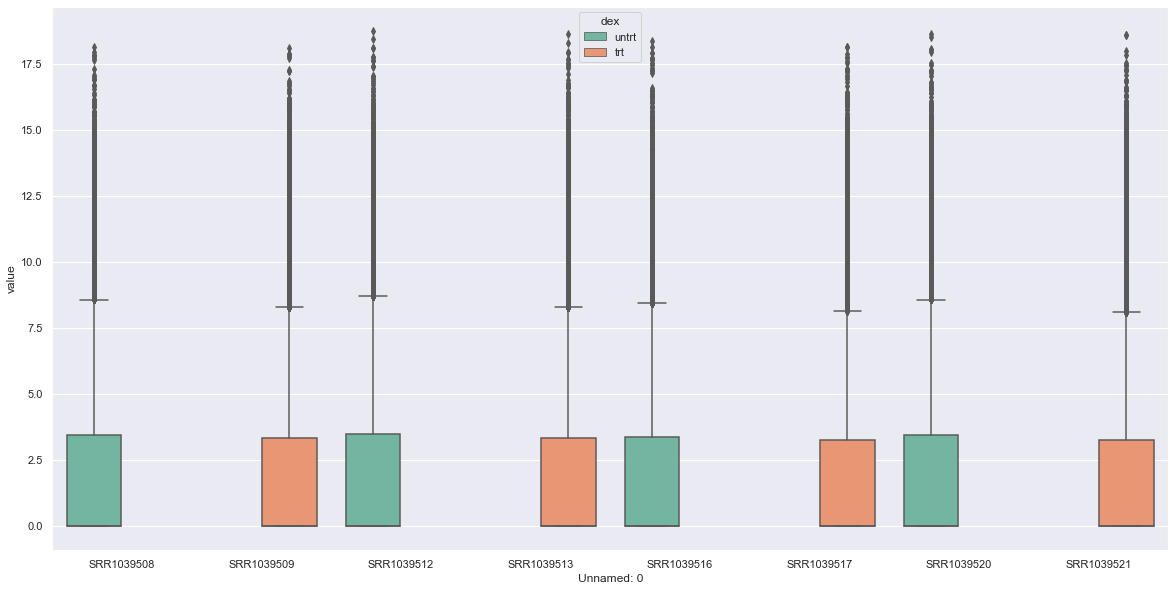

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'Unnamed: 0', y = 'value' , data = databox, hue = 'dex' )

**2.** Сравним, насколько в целом изменяется экспресиия генов после воздействия дексаметазоном. Для каждой кл. линии (колонка cell в metadata) посчитайте корреляцию и постройте скаттер-плот зависимости до/после воздействия. Так же посчитайте все попарные корреляции различных реплик до воздействия (dex == untrt) и после.

SpearmanrResult(correlation=0.9201625001725072, pvalue=0.0)
SpearmanrResult(correlation=0.9139508476984635, pvalue=0.0)
SpearmanrResult(correlation=0.9166604341871352, pvalue=0.0)
SpearmanrResult(correlation=0.9122907628672972, pvalue=0.0)


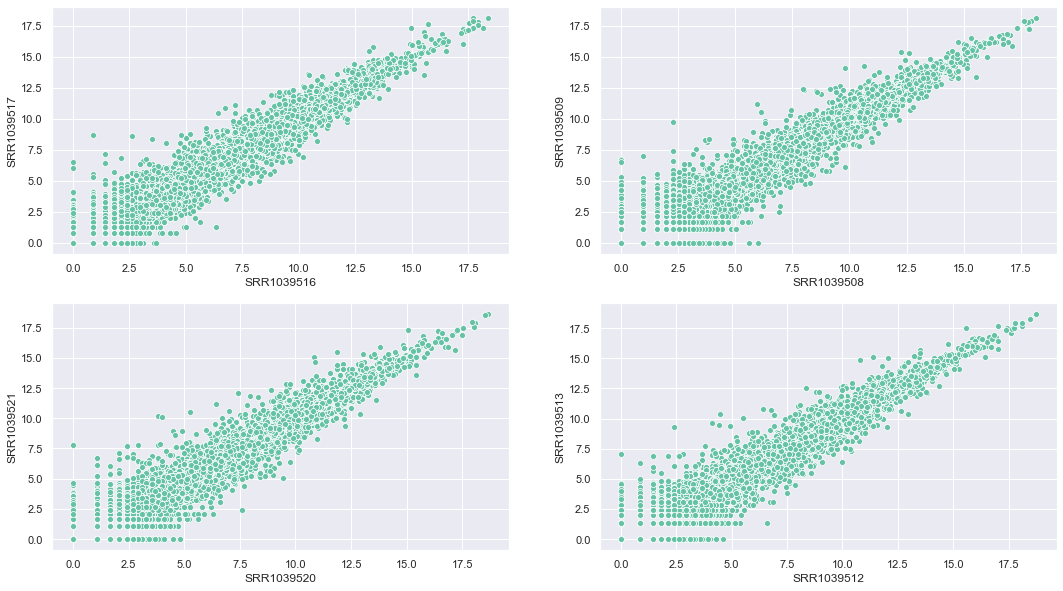

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10 ))
dt= set(data_annot['cell'].tolist())
for num, k in enumerate(dt):
    i = num % 2 
    j = num // 2
    x, y = data_annot.loc[data_annot['cell'] == k, 'Run']
    plot = sns.scatterplot(x = x, y = y ,data = data, ax=axes[j, i])
    print(sps.spearmanr(data[x], data[y]))


**3.** С помощью критериев согласия определите, как распределены данные — нормально или как negative binominal.

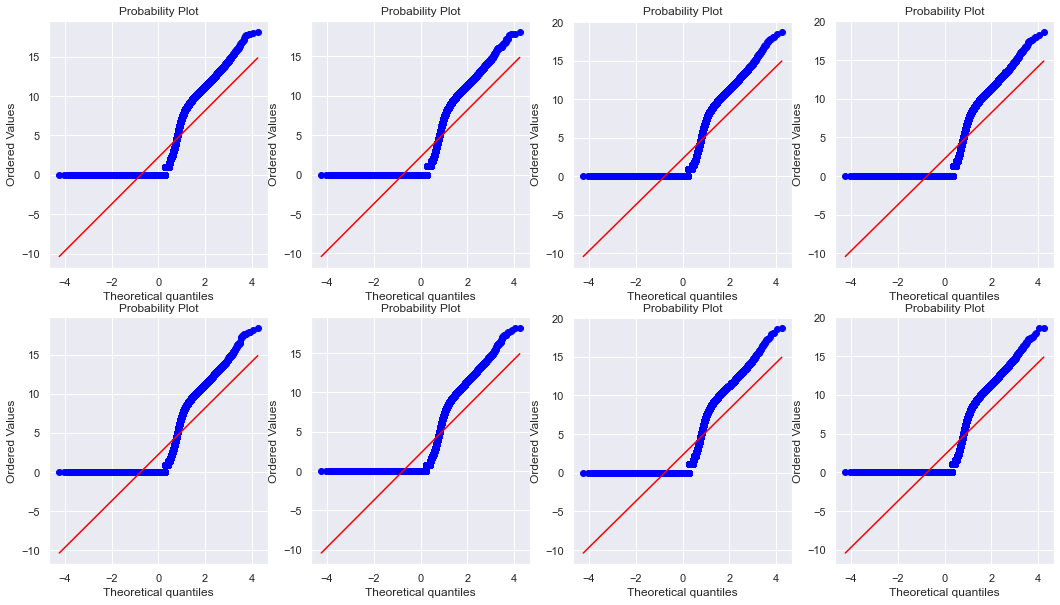

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10 ))
for ax, k in zip(axes.flat, data_annot['Run'].tolist()):
    sps.probplot(data[k], plot=ax)

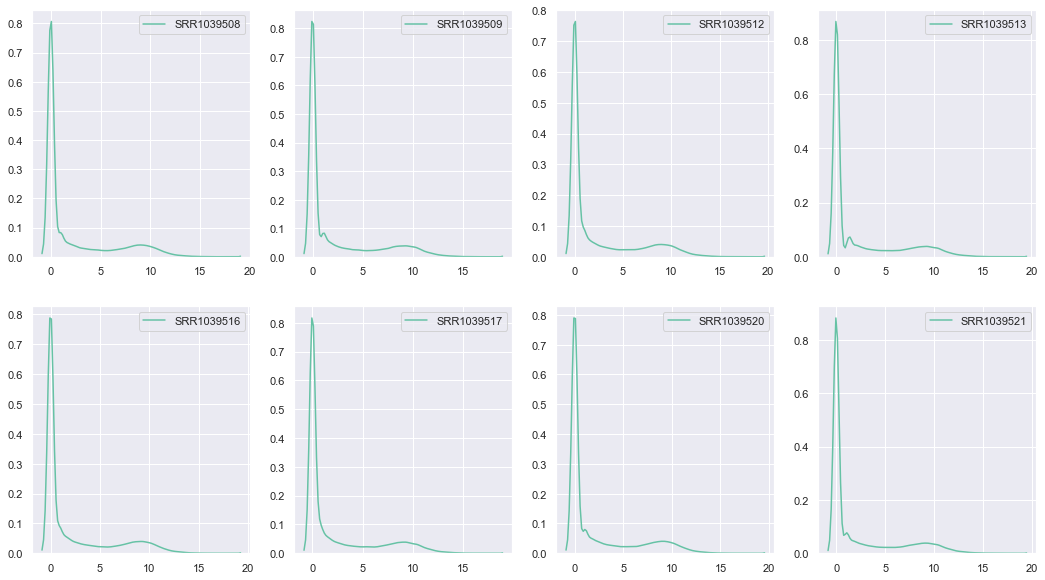

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10 ))
for ax, k in zip(axes.flat, data_annot['Run'].tolist()):
    sns.kdeplot(data[k], ax=ax)

Очевидно, что данные распределены не нормально, а значит это negative binominal.

**4.** Напишите функцию, которая для каждого гена будет оценивать разницу в средней экспрессии в каждой из двух групп. Разница оценивается как log-fold-change — логарифм отношения средних двух групп.

In [15]:
def calculate_logFC(group1, group2):
    """
    :group1:   данные экспрессии после обработки дексаметазоном 
    :group2:   данные экспрессии до обработки дексаметазоном 
    
    :return:   логарифм отношения средних двух групп
    """
    
    logFC = np.log2(group1.mean()/group2.mean())
    
    return logFC

Рассчитайте значение logFC и просто среднее значение экспрессии во всех образцах для каждого гена. 

In [16]:
dataFC.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
dataFC = dataFC.set_index('index').T
dataFC['dex'] = data_annot['dex'].tolist()

In [39]:
fc = []

untrt = data_annot.loc[data_annot['dex'] == 'untrt', 'Run'].tolist()
trt = data_annot.loc[data_annot['dex'] == 'trt', 'Run'].tolist()

for name in data['Unnamed: 0'].tolist():
    values = dataFC[name]
    av = values.mean()
    if values[trt].mean() == 0 or values[untrt].mean() == 0:
        FC = None
    else:
        FC = calculate_logFC(values[trt], values[untrt])
    if av == 0:
        logA = None
    else:
        logA = np.log2(av)
    
    fc.append([name, av, FC, logA])
table = pd.DataFrame(data = fc, columns = ['Gene', 'average', 'log(FC)', 'log(AE)'])
table


,Gene,average,log(FC),log(AE)
0,ENSG00000000003,9.443961,-0.058124,3.239392
1,ENSG00000000005,0.000000,NaN,NaN
2,ENSG00000000419,9.020636,0.032985,3.173229
3,ENSG00000000457,7.893050,0.006772,2.980583
4,ENSG00000000460,5.839022,-0.015151,2.545727
...,...,...,...,...
64097,LRG_94,0.000000,NaN,NaN
64098,LRG_96,0.000000,NaN,NaN
64099,LRG_97,0.000000,NaN,NaN
64100,LRG_98,0.000000,NaN,NaN


In [31]:
type(table['average'][2])

numpy.float64

Постройте график зависимости log(average expression) и log-fold-change как scatter plot.

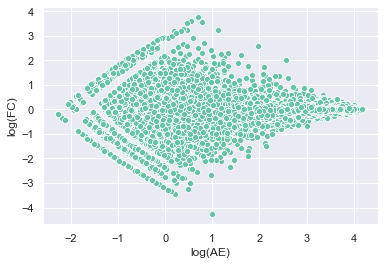

In [32]:
plot = sns.scatterplot(x = 'log(AE)', y = 'log(FC)', data = table)

**5.** Для каждого гена сравните распределения в двух группах и рассчитайте статистическую значимость того, что распределения одинаковы. Какой тест необходимо использовать в этом случае? Если необходимо, выполните проверки. Не забывайте про поправку на множественное тестирование!

В лекциях применялся критерий Уилкоксона-Манна-Уитни 

Для решения задачи проверим гипотезы об однородности экспресии до и после воздействия для каждого гена.

In [33]:
testing_result = []

for name in data['Unnamed: 0'].tolist():  # для каждого белков
    
    values = dataFC[name]
    
    # разделяем данные по воздействию на гены
    x = values[trt]
    y = values[untrt]
    if list(x) != list(y):    
        # применяем критерий Уилкоксона-Манна-Уитни
        krit = list(sps.mannwhitneyu(x, y, alternative='two-sided'))
        
        testing_result.append([name] + krit)
        
# оформляем в виде pandas-таблицы
testing_result = pd.DataFrame(testing_result, columns=['name', 'stats', 'pvalue'])
testing_result

,name,stats,pvalue
0,ENSG00000000003,2.0,0.112351
1,ENSG00000000419,16.0,0.030383
2,ENSG00000000457,8.0,0.885234
3,ENSG00000000460,6.0,0.665006
4,ENSG00000000938,4.0,0.185877
...,...,...,...
33464,ENSG00000273487,15.0,0.060602
33465,ENSG00000273488,7.0,0.885234
33466,ENSG00000273489,12.0,0.185877
33467,ENSG00000273492,6.0,0.453255


Далее я проверила есть ли на данном этапе различия в эксперессии (log-fold-chang > 1) и учла, что при этом распредедения не одинаковы. Просто было интересно есть ли какие-то отличия с картиной после множественной проверки гипотез.

In [34]:
count=0
for i in testing_result['name'].tolist():
    if float(testing_result.loc[testing_result['name'] == i, 'pvalue'].tolist()[0]) <= 0.05:
        if table.loc[table['Gene'] == i, 'log(FC)'].tolist()[0] != None:
            if abs(float(table.loc[table['Gene'] == i, 'log(FC)'].tolist()[0])) > 1.0:
                count += 1
print(count)

297


Применяем множественную проверку гипотез к результату. В итоговой таблица результатов в последней колонке указано True, если гипотеза однородности отвергается для данного гена, т.е. для него есть значимое различие в экспрессии до и после воздействия.

In [35]:
from statsmodels.sandbox.stats.multicomp import multipletests

is_reject, pvalue_corrected = multipletests(testing_result['pvalue'], method='fdr_by')[:2] 
#если использовать method='fdr_bh', то p-value_corrected перестанет быть единицей,
#но гипоза однородности все равно не будет нигде отвергнута 
testing_result['pvalue_corrected'] = pvalue_corrected
testing_result['is_reject'] = is_reject
testing_result['-log(p-vc)'] = -(np.log10(testing_result['pvalue_corrected']))
testing_result

,name,stats,pvalue,pvalue_corrected,is_reject,-log(p-vc)
0,ENSG00000000003,2.0,0.112351,1.0,False,-0.0
1,ENSG00000000419,16.0,0.030383,1.0,False,-0.0
2,ENSG00000000457,8.0,0.885234,1.0,False,-0.0
3,ENSG00000000460,6.0,0.665006,1.0,False,-0.0
4,ENSG00000000938,4.0,0.185877,1.0,False,-0.0
...,...,...,...,...,...,...
33464,ENSG00000273487,15.0,0.060602,1.0,False,-0.0
33465,ENSG00000273488,7.0,0.885234,1.0,False,-0.0
33466,ENSG00000273489,12.0,0.185877,1.0,False,-0.0
33467,ENSG00000273492,6.0,0.453255,1.0,False,-0.0


In [36]:
(testing_result['is_reject'].tolist()).count("True")

0

Визуализируйте результаты как volcano plot и, если получится, определите 10 самых дифференциально экспрессированных генов. Какими фунцкиями они обладают?

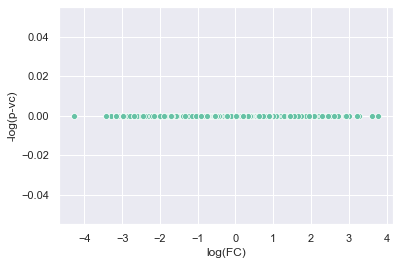

In [37]:
plot = sns.scatterplot(x = table['log(FC)'], y = testing_result['-log(p-vc)'])

### Обсуждение результатов

К сожалению, по непонятной мне причине, у меня получилось, что после поправки на множественное тестирование значимых различий в экспрессии до и после воздействия у нас нет. А значит строить volcano plot cмысла не имеет, и никакой информации мы из него не получим (второй раз мой комп не смог построить график на 33 тысячи точек и просто умер).

Выполнила Голиус Маргарита Б06-801